In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers


from tensorflow.keras import callbacks

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random

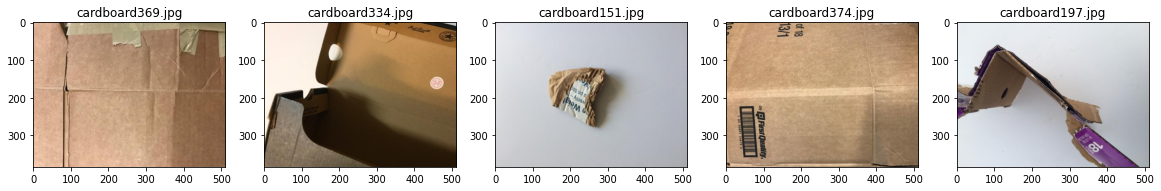

In [2]:
plt.figure(figsize=(20,20))
test_folder=r'../raw_data/Garbage_classification/cardboard/'
img_folder = test_folder
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [3]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'../raw_data/Garbage_classification/'

In [4]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name# extract the image array and class name
img_data, class_name =create_dataset(r'../raw_data/Garbage_classification/')

In [5]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [6]:
X_data = np.array(img_data)


In [7]:
X_data.shape
#y_data.size

(2527, 200, 200, 3)

In [8]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [9]:
y_data= np.array(target_val)

In [10]:
data = {'X':img_data,
        'y':target_val}
 

In [11]:
df = pd.DataFrame(data)

In [12]:
df['X'][0].shape

(200, 200, 3)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)

In [15]:
X_train.shape

(1693, 200, 200, 3)

In [16]:
X_train[0].shape

(200, 200, 3)

In [17]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=6)
y_test_cat = to_categorical(y_test, num_classes=6)

In [18]:
y_train_cat[0]

array([0., 0., 0., 1., 0., 0.], dtype=float32)

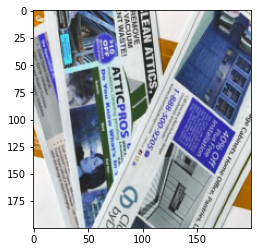

In [19]:
img = X_train[0]


plt.imshow(img)

https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6

In [20]:
def initialize_model():
    
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3,3), input_shape=(200, 200,3),activation='relu',padding='same'))
    
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Conv2D(64, (3,3),activation='relu',padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(128, (3,3),activation='relu',padding='same'))
    model.add(layers.MaxPool2D(pool_size=(3,3)))
    ### Flattening
    
    model.add(layers.Flatten())
    ### One fully connected
    
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(60, activation='relu'))
    
    model.add(layers.Dropout(rate=0.5))
    model.add(layers.Dense(6, activation='softmax'))
    ### Model compilation
    
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model
    
model = initialize_model()

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
X_train.shape

(1693, 200, 200, 3)

In [24]:
model = initialize_model()
history =model.fit(X_train, y_train_cat, 
          validation_data=(X_test, y_test_cat),
          epochs=5, 
          batch_size=32, 
          verbose=0)

In [28]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)


(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Accuracy'}>)

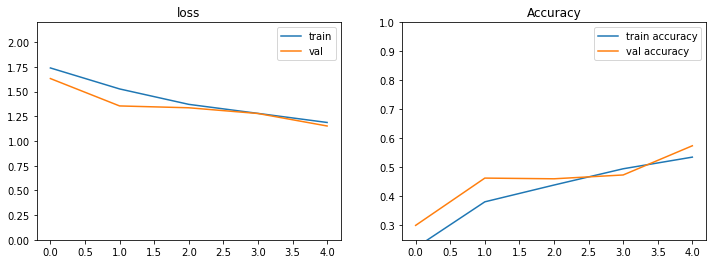

In [29]:
plot_history(history,title='',exp_name='')

In [30]:
result= model.evaluate(X_test, y_test_cat, verbose=0)
result

[1.1514791250228882, 0.5743405222892761]

In [33]:
y_pred = model.predict(X_test)

In [45]:
img.shape

img = np.reshape(img, [1, 200, 200, 3])

In [46]:
model.predict(img)

array([[1.3444238e-02, 7.4827136e-04, 6.4427696e-02, 9.1867650e-01,
        2.6248177e-03, 7.8370802e-05]], dtype=float32)

In [47]:
print(np.argmax(model.predict(img)))

3


In [28]:
import pickle

enregistrer le modele et les poids (mettre en commentaire pour pas reexecuter)

In [48]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [49]:
model.save_weights("model.h5")

In [34]:
## load json and create model
#json_file = open('model.json', 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#loaded_model = model_from_json(loaded_model_json)
## load weights into new model
#loaded_model.load_weights("model.h5")

In [51]:
X_train[0].shape

(200, 200, 3)

test vgg166 en changeant la sortie (probablement une mauvaise idée

In [57]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
    model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
    return model

In [58]:
def set_nontrainable_layers(model):
    # Set the first layers to be untrainable
    model.trainable = False
    
    return model

In [59]:
def add_last_layers(model):
    base_model = set_nontrainable_layers(model)
    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(6, activation='softmax')
    
    
    model = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
    
    return model

In [60]:
from tensorflow.keras import optimizers

In [61]:
def compile_model(model):
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    return model

In [62]:
def build_model():
    
    model = load_model()
    model = add_last_layers(model)
    model = compile_model(model)
    
    return model

In [63]:
from tensorflow.keras.applications.vgg16 import preprocess_input
#model vgg16 need special pre process , remember to re do cause i preprocessed when uploading my trash image

In [64]:
X_train = preprocess_input(X_train) 
#X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

#to do


In [65]:
new_model=build_model()

In [66]:
X_train.shape

(1693, 200, 200, 3)

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_acc', mode='max', patience=5, verbose=1, restore_best_weights=True)

history = new_model.fit(X_train, y_train_cat, 
                    validation_data=(X_test, y_test_cat), 
                     
                    epochs=5, 
                    batch_size=32, 
                    verbose=0)

(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Accuracy'}>)

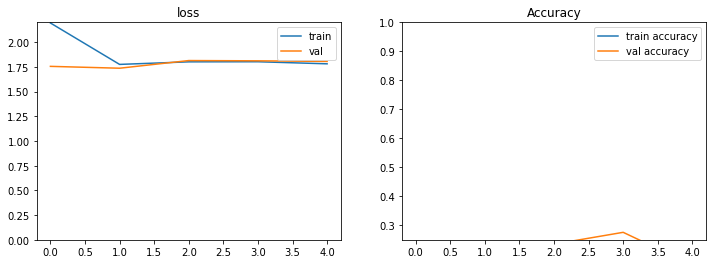

In [69]:
plot_history(history,title='',exp_name='')

In [70]:
result= model.evaluate(X_test, y_test_cat, verbose=0)
result

[5962.69775390625, 0.20263789594173431]